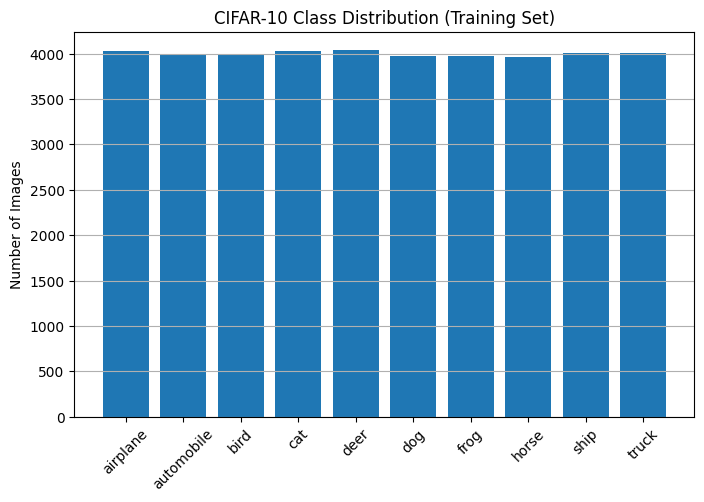

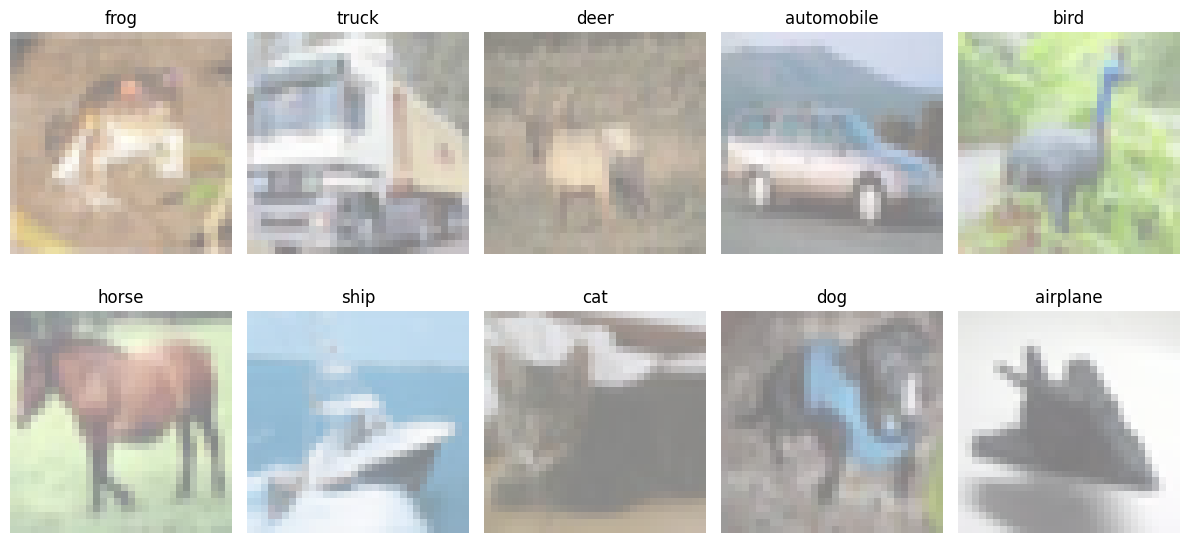

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ------------------
# Config
# ------------------
batch_size = 64
num_epochs = 50
lr = 0.001
n_class = 10
patience = 5
min_delta = 1e-4

# ------------------
# Data
# ------------------
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010)),
])

train_dataset_full = torchvision.datasets.CIFAR10(root='./data',
                                                  train=True,
                                                  transform=transform_train,
                                                  download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                            train=False,
                                            transform=transform_test,
                                            download=True)

# Split train into train/validation
train_len = int(len(train_dataset_full) * 0.8)
valid_len = len(train_dataset_full) - train_len
train_dataset, valid_dataset = random_split(
    train_dataset_full, [train_len, valid_len],
    generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ------------------
# Visualize class distribution
# ------------------
labels = [label for _, label in train_dataset]
label_counts = Counter(labels)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
class_counts = {classes[i]: label_counts[i] for i in range(10)}

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.title("CIFAR-10 Class Distribution (Training Set)")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()

# ------------------
# Show one image per class
# ------------------
transform_show = transforms.Compose([transforms.ToTensor()])
trainset_show = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform_show)

images_shown = {}
fig = plt.figure(figsize=(12, 6))
for img, label in trainset_show:
    class_name = classes[label]
    if class_name not in images_shown:
        images_shown[class_name] = (img, class_name)
        ax = fig.add_subplot(2, 5, len(images_shown))
        img = img / 2 + 0.5  # simple unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.set_title(class_name)
        ax.axis('off')
        if len(images_shown) == 10:
            break
plt.tight_layout()
plt.show()




In [5]:
# ------------------
# Simple CNN Model (like your convnet_3)
# ------------------
import torch.nn as nn
import torch.nn.functional as F

class ConvNet3(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet3, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(128*4*4, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


Using device: cuda
Epoch [1/50] Train Loss: 1.4099 Valid Loss: 1.2161 Acc: 0.5741
Epoch [2/50] Train Loss: 1.0739 Valid Loss: 1.0758 Acc: 0.6243
Epoch [3/50] Train Loss: 0.9488 Valid Loss: 0.9127 Acc: 0.6873
Epoch [4/50] Train Loss: 0.8779 Valid Loss: 0.8884 Acc: 0.6936
Epoch [5/50] Train Loss: 0.8234 Valid Loss: 0.8041 Acc: 0.7167
Epoch [6/50] Train Loss: 0.7736 Valid Loss: 0.7702 Acc: 0.7354
Epoch [7/50] Train Loss: 0.7398 Valid Loss: 0.7900 Acc: 0.7234
Epoch [8/50] Train Loss: 0.7115 Valid Loss: 0.7115 Acc: 0.7524
Epoch [9/50] Train Loss: 0.6789 Valid Loss: 0.7969 Acc: 0.7276
Epoch [10/50] Train Loss: 0.6599 Valid Loss: 0.7678 Acc: 0.7418
Epoch [11/50] Train Loss: 0.6410 Valid Loss: 0.7341 Acc: 0.7520
Epoch [12/50] Train Loss: 0.5662 Valid Loss: 0.6202 Acc: 0.7826
Epoch [13/50] Train Loss: 0.5526 Valid Loss: 0.6147 Acc: 0.7923
Epoch [14/50] Train Loss: 0.5435 Valid Loss: 0.6173 Acc: 0.7831
Epoch [15/50] Train Loss: 0.5360 Valid Loss: 0.6008 Acc: 0.7923
Epoch [16/50] Train Loss: 0.52

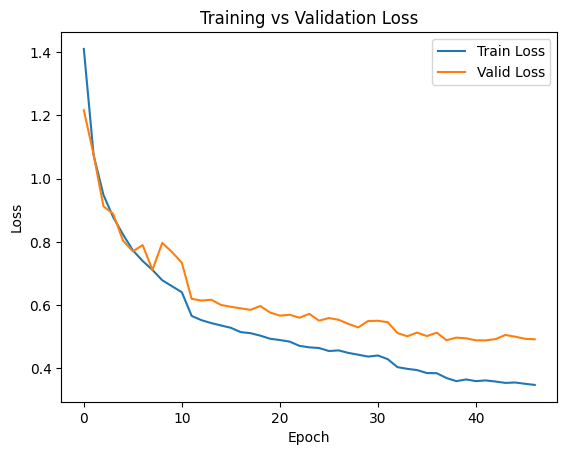

              precision    recall  f1-score   support

    airplane       0.85      0.87      0.86      1000
  automobile       0.92      0.92      0.92      1000
        bird       0.82      0.75      0.78      1000
         cat       0.68      0.72      0.70      1000
        deer       0.82      0.82      0.82      1000
         dog       0.76      0.77      0.77      1000
        frog       0.88      0.89      0.89      1000
       horse       0.89      0.86      0.87      1000
        ship       0.91      0.91      0.91      1000
       truck       0.90      0.90      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



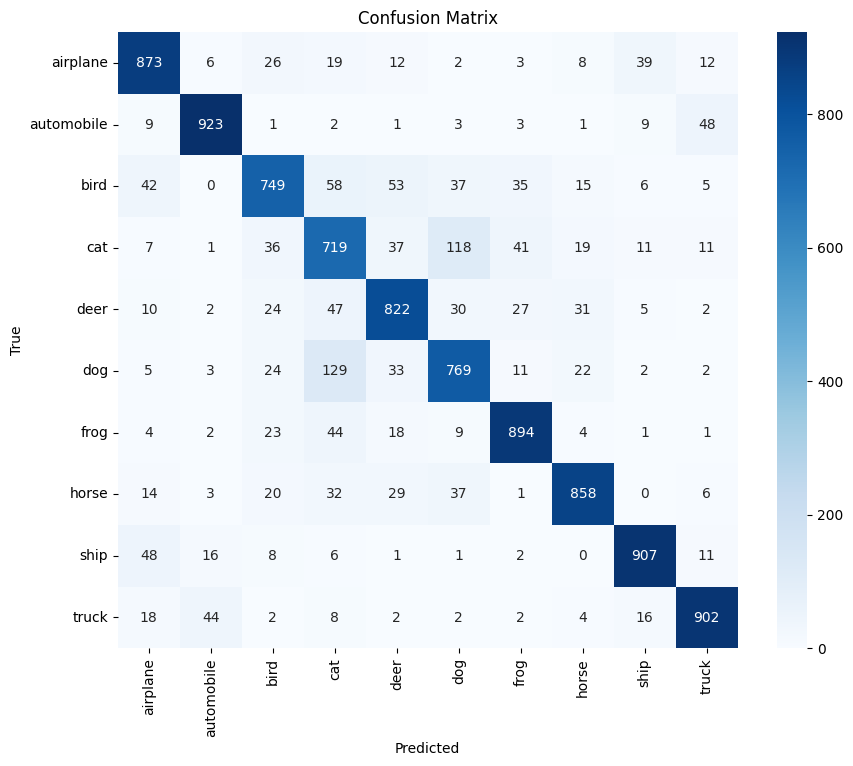

In [6]:
# ------------------
# Training
# ------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = ConvNet3().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                       factor=0.5, patience=2)

train_loss, valid_loss = [], []
best_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(num_epochs):
    # Train
    model.train()
    running_loss = 0.0
    for imgs, lbls in train_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        optimizer.zero_grad()
        out = model(imgs)
        loss = loss_fn(out, lbls)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    train_loss.append(avg_train_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    running_val_loss = 0.0
    with torch.no_grad():
        for imgs, lbls in valid_loader:
            imgs, lbls = imgs.to(device), lbls.to(device)
            out = model(imgs)
            loss_val = loss_fn(out, lbls)
            running_val_loss += loss_val.item()
            preds = torch.argmax(out, dim=1)
            correct += (preds == lbls).sum().item()
            total += lbls.size(0)
    avg_val_loss = running_val_loss / len(valid_loader)
    val_acc = correct / total
    valid_loss.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {avg_train_loss:.4f} "
          f"Valid Loss: {avg_val_loss:.4f} "
          f"Acc: {val_acc:.4f}")

    scheduler.step(avg_val_loss)

    # Early stopping
    if best_val_loss - avg_val_loss > min_delta:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping.")
            break

# Plot losses
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# ------------------
# Test Evaluation
# ------------------
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for imgs, lbls in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1).cpu()
        all_preds.extend(preds.numpy())
        all_labels.extend(lbls.numpy())

print(classification_report(all_labels, all_preds, target_names=classes))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
